# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [30]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [31]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [32]:
# Splitting our data and initializing a Scaler
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
# Transforming our data
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

X_train_s.shape


(426, 30)

## Constructing a Neural Network in Keras

In [34]:
# Importing model and layer types


from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

In [35]:
# Constructing and compiling our model

model = Sequential()

inputs = X_train_s.shape[1]

hiddens = inputs

model.add(Dense(hiddens, input_dim= inputs, activation='relu'))
model.add(Dense(1))
adam = Adam()

model.compile(adam, loss='mean_squared_error')



In [36]:
# Fitting our model
model.fit(X_train_s, y_train,
          validation_data = (X_test_s, y_test), epochs=110)


Train on 426 samples, validate on 143 samples
Epoch 1/110
426/426 [==============================] - 0s 449us/step - loss: 1.3991 - val_loss: 0.9374
Epoch 2/110
426/426 [==============================] - 0s 48us/step - loss: 0.6573 - val_loss: 0.5287
Epoch 3/110
426/426 [==============================] - 0s 42us/step - loss: 0.4139 - val_loss: 0.3613
Epoch 4/110
426/426 [==============================] - 0s 61us/step - loss: 0.3059 - val_loss: 0.2722
Epoch 5/110
426/426 [==============================] - 0s 42us/step - loss: 0.2378 - val_loss: 0.2210
Epoch 6/110
426/426 [==============================] - 0s 55us/step - loss: 0.1960 - val_loss: 0.1811
Epoch 7/110
426/426 [==============================] - 0s 49us/step - loss: 0.1669 - val_loss: 0.1533
Epoch 8/110
426/426 [==============================] - 0s 38us/step - loss: 0.1465 - val_loss: 0.1448
Epoch 9/110
426/426 [==============================] - 0s 42us/step - loss: 0.1292 - val_loss: 0.1277
Epoch 10/110
426/426 [=============

426/426 [==============================] - 0s 30us/step - loss: 0.0264 - val_loss: 0.0590
Epoch 81/110
426/426 [==============================] - 0s 38us/step - loss: 0.0265 - val_loss: 0.0594
Epoch 82/110
426/426 [==============================] - 0s 34us/step - loss: 0.0261 - val_loss: 0.0603
Epoch 83/110
426/426 [==============================] - 0s 40us/step - loss: 0.0259 - val_loss: 0.0599
Epoch 84/110
426/426 [==============================] - 0s 33us/step - loss: 0.0256 - val_loss: 0.0592
Epoch 85/110
426/426 [==============================] - 0s 33us/step - loss: 0.0254 - val_loss: 0.0593
Epoch 86/110
426/426 [==============================] - 0s 33us/step - loss: 0.0253 - val_loss: 0.0580
Epoch 87/110
426/426 [==============================] - 0s 33us/step - loss: 0.0249 - val_loss: 0.0579
Epoch 88/110
426/426 [==============================] - 0s 34us/step - loss: 0.0250 - val_loss: 0.0589
Epoch 89/110
426/426 [==============================] - 0s 35us/step - loss: 0.0245 - 

In [37]:
# Storing that fit as a history log

history_log = model.fit(X_train_s, y_train,
          validation_data = (X_test_s, y_test), epochs=100)



Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 35us/step - loss: 0.0204 - val_loss: 0.0544
Epoch 2/100
426/426 [==============================] - 0s 40us/step - loss: 0.0201 - val_loss: 0.0546
Epoch 3/100
426/426 [==============================] - 0s 39us/step - loss: 0.0201 - val_loss: 0.0539
Epoch 4/100
426/426 [==============================] - 0s 39us/step - loss: 0.0207 - val_loss: 0.0525
Epoch 5/100
426/426 [==============================] - 0s 44us/step - loss: 0.0199 - val_loss: 0.0567
Epoch 6/100
426/426 [==============================] - 0s 35us/step - loss: 0.0203 - val_loss: 0.0528
Epoch 7/100
426/426 [==============================] - 0s 35us/step - loss: 0.0198 - val_loss: 0.0538
Epoch 8/100
426/426 [==============================] - 0s 47us/step - loss: 0.0191 - val_loss: 0.0534
Epoch 9/100
426/426 [==============================] - 0s 44us/step - loss: 0.0193 - val_loss: 0.0519
Epoch 10/100
426/426 [==============

426/426 [==============================] - 0s 35us/step - loss: 0.0110 - val_loss: 0.0496
Epoch 81/100
426/426 [==============================] - 0s 37us/step - loss: 0.0111 - val_loss: 0.0513
Epoch 82/100
426/426 [==============================] - 0s 39us/step - loss: 0.0110 - val_loss: 0.0509
Epoch 83/100
426/426 [==============================] - 0s 39us/step - loss: 0.0107 - val_loss: 0.0531
Epoch 84/100
426/426 [==============================] - 0s 37us/step - loss: 0.0113 - val_loss: 0.0504
Epoch 85/100
426/426 [==============================] - 0s 34us/step - loss: 0.0121 - val_loss: 0.0524
Epoch 86/100
426/426 [==============================] - 0s 36us/step - loss: 0.0110 - val_loss: 0.0517
Epoch 87/100
426/426 [==============================] - 0s 37us/step - loss: 0.0111 - val_loss: 0.0508
Epoch 88/100
426/426 [==============================] - 0s 43us/step - loss: 0.0105 - val_loss: 0.0511
Epoch 89/100
426/426 [==============================] - 0s 36us/step - loss: 0.0103 - 

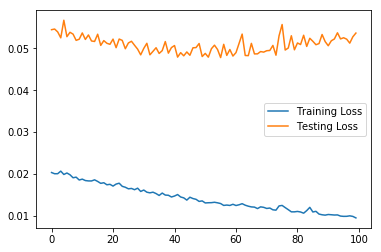

In [38]:
# Plotting our losses

train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']


plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

plt.legend()



## Tensorflow

In [40]:



import tensorflow as tf






### Tensorflow as a graph constructor

In [58]:
# Constructing the graph

a = 3
b = 5
c = a+ b
c


8

In [56]:
a += 1
a

17

In [59]:
a = tf.Variable(3)
b = tf.Variable(5)
c = a + b
d = a + c * b

In [63]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(d)
print(result)

43


In [8]:
# Starting a session



In [9]:
# Printing the output



### Neural Network

In [65]:



X_train_s.shape




(426, 30)

In [66]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.


In [68]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.3776223776223776